In this section, we will learn how to use pie chart appropriately
Also when to use scatter plot appropriately
We only use by part when there is a boolean value for one column, at most 3 data type.anything more, consider a bar chart

In [3]:
import pandas as pd
from datasets import load_dataset
import ast

import matplotlib.pyplot as plt

#loading data
df = load_dataset('lukebarousse/data_jobs')['train'].to_pandas()

#data clean up
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df.describe()
df.info()
df.iloc[0:2]

##Data cleanup
#filter to US jobs
df_US = df[(df.job_country == 'United States') & (df.job_title_short == 'Business Analyst')]
#transition the str skills to list 
df_US['job_skills'] = df_US['job_skills'].apply(lambda skill: ast.literal_eval(skill) if pd.notna(skill) else skill)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

C:\Users\david\AppData\Local\Temp\ipykernel_15572\917515891.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_US['job_skills'] = df_US['job_skills'].apply(lambda skill: ast.literal_eval(skill) if pd.notna(skill) else skill)


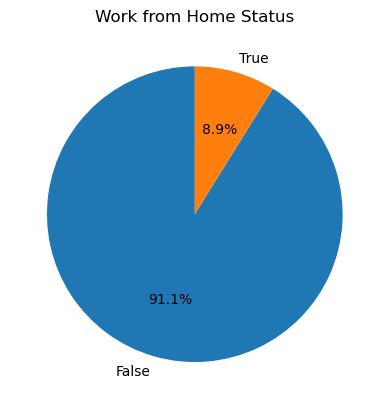

In [4]:
df['job_work_from_home'].value_counts().plot(kind = 'pie', startangle = 90, autopct = '%1.1f%%')
plt.title('Work from Home Status')
plt.ylabel('')
plt.show()

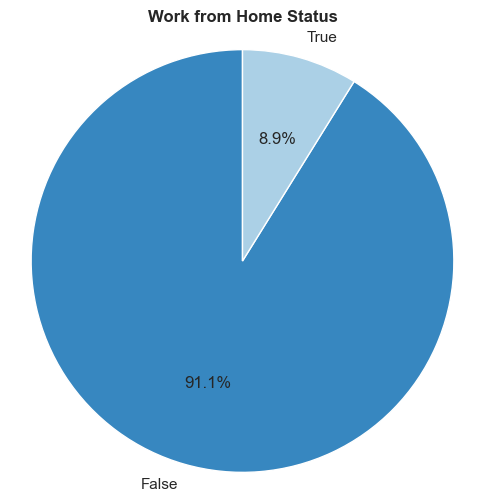

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn theme for consistent style
sns.set_theme(style="whitegrid")

# Data for the pie chart
labels = df['job_work_from_home'].value_counts().index
sizes = df['job_work_from_home'].value_counts().values

# Create pie chart using matplotlib
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Blues_r", len(sizes)))

# Set title, remove y-label
ax.set_title('Work from Home Status', fontweight='bold')
ax.set_ylabel('')  # Remove y-axis label

# Equal aspect ratio ensures pie chart is drawn as a circle
ax.axis('equal')

# Show the plot
plt.show()


### BONUS SECTION 
how to use filter out data to be in the pie chart using a helper identifier

In [5]:
df_US.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
60,Business Analyst,Business Intelligence Intern,"Dallas, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 13:02:07,False,False,United States,None,NaN,NaN,Copart,"[r, python, sql, tableau, power bi]","{'analyst_tools': ['tableau', 'power bi'], 'pr..."
204,Business Analyst,Procurement Analyst,"Villa Park, IL",via ZipRecruiter,Full-time,False,"Illinois, United States",2023-08-27 13:02:11,False,False,United States,None,NaN,NaN,"Sara Lee Frozen Bakery,LLC","[excel, powerpoint]","{'analyst_tools': ['excel', 'powerpoint']}"
329,Business Analyst,Senior Management Analyst,"San Antonio, TX",via Trabajo.org,Full-time,False,"Texas, United States",2023-10-29 13:01:08,False,False,United States,None,NaN,NaN,City of San Antonio Texas,[c],{'programming': ['c']}
578,Business Analyst,Jr. Business Intelligence Analyst,"St Paul, MO",via Adzuna,Full-time,False,"Illinois, United States",2023-02-15 13:02:31,False,False,United States,None,NaN,NaN,"Staffigo Technical Services, LLC","[sql, r, sas, sas, python, hadoop, power bi, t...","{'analyst_tools': ['sas', 'power bi', 'tableau..."
642,Business Analyst,Business Intelligence Analyst,"Vinings, GA",via LinkedIn,Full-time,False,Georgia,2023-06-27 13:56:13,False,False,United States,None,NaN,NaN,Brooksource,"[sql, python, r, tableau]","{'analyst_tools': ['tableau'], 'programming': ..."


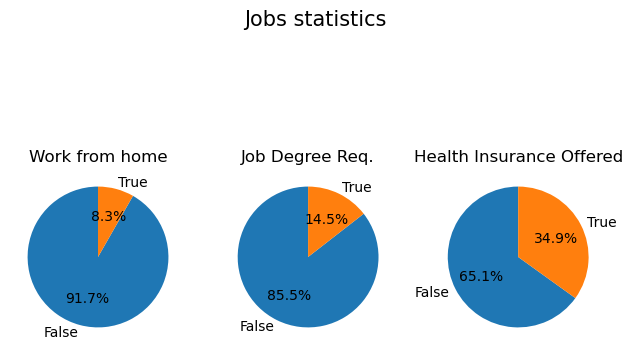

In [6]:


fig, ax = plt.subplots(1,3)
#dictionaries method
# enumurate out the dictionaries into pairs of keys and values in a tuples, we can use that to build multiple pie plot with 1 for loop and a tuple
#using a dictionary to manipulate the parameter which column and which name pf tje .plot
remote = {
    'job_work_from_home' : 'Work from home',
    'job_no_degree_mention': 'Job Degree Req.',
    'job_health_insurance': 'Health Insurance Offered'
}

for i, (x,y) in enumerate(remote.items()):
    #using pandas plot
    df_US[x].value_counts().plot(kind='pie', ax=ax[i], startangle = 90, autopct = '%1.1f%%')
    #using ax[i] plot
    #ax[i].pie(df[x].value_count(), startangle = 90, autopct = '%1.1f%%', labels=['False','True']) #have to label it, prefer pandas one
    ax[i].set_title(y)
    ax[i].set_ylabel('')

#clean up fig
fig.suptitle('Jobs statistics', fontsize= 15)
# Add a universal y-axis label
#fig.text(0.04, 0.5, 'Job Skills', va='center', rotation='vertical', fontsize=12)
# Adjust layout to prevent overlap and leave space for the suptitle
fig.tight_layout()  # Increase the left rect margin, left, bottom, right, top where 0,0,1,1 is the whole space and it changes from there

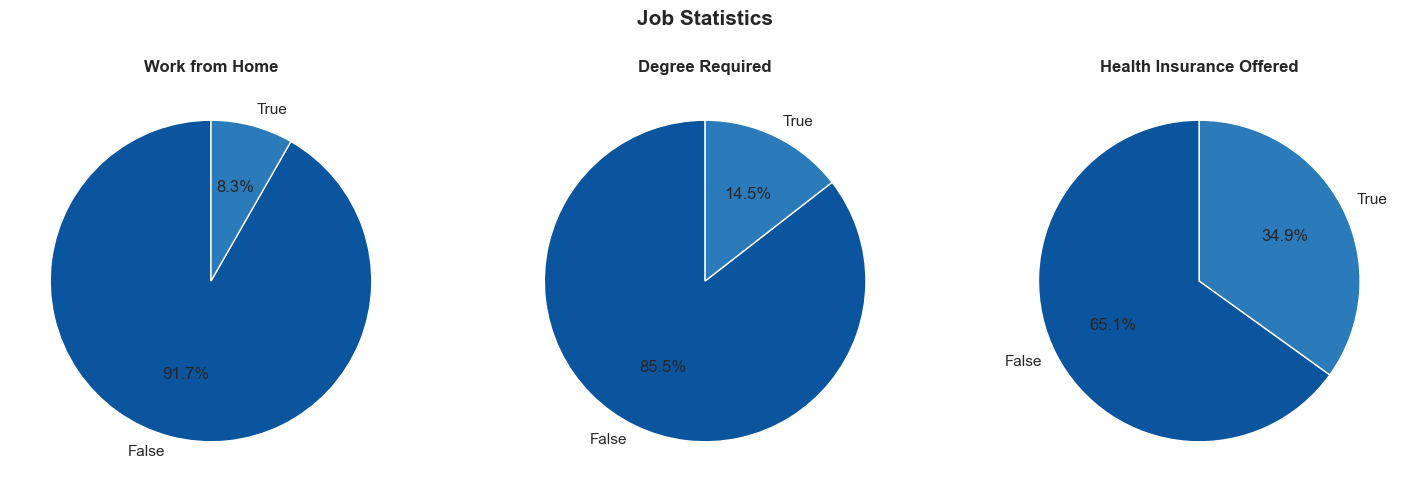

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn theme for consistent style
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(1, 3, figsize=(15, 5))  # Adjusted figure size for better spacing

# Dictionaries method
remote = {
    'job_work_from_home': 'Work from Home',
    'job_no_degree_mention': 'Degree Required',
    'job_health_insurance': 'Health Insurance Offered'
}

# Loop through the dictionary to create multiple pie plots
for i, (column, title) in enumerate(remote.items()):
    df_US[column].value_counts().plot(kind='pie', ax=ax[i], startangle=90, autopct='%1.1f%%', colors=sns.color_palette("Blues_r"))
    ax[i].set_title(title, fontweight='bold')  # Bold titles
    ax[i].set_ylabel('')  # Remove y-axis labels
    ax[i].set_xlabel('')  # Remove x-axis labels for a clean look

# Clean up the figure
fig.suptitle('Job Statistics', fontsize=15, fontweight='bold')  # Bold title for the entire figure

# Adjust layout to prevent overlap and leave space for the title
fig.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make space for the super title

# Show the plot
plt.show()


We use Scatter plot when we want to show relationship between 2 variables

In [7]:
# we want to graph a bunch if skills on a count of the skills and the median yearly salary
df_skills = df_US.explode('job_skills').groupby('job_skills').agg(
    count=('job_skills', 'size'),                      # Count occurrences of each skill
    median_salary=('salary_year_avg', 'median')        # Median salary for each skill
).sort_values(by='count', ascending=False).head(10).reset_index()         # Reset the index to turn 'job_skills' back into a column




In [8]:
df_skills

,job_skills,count,median_salary
0,sql,3564,95000.0
1,excel,3128,85000.0
2,tableau,2213,99800.0
3,power bi,1558,90550.0
4,python,1409,101750.0
5,sas,1074,110150.0
6,powerpoint,1042,90000.0
7,r,929,100000.0
8,word,890,85000.0
9,oracle,496,96250.0


In [9]:
df_skills.index

RangeIndex(start=0, stop=10, step=1)

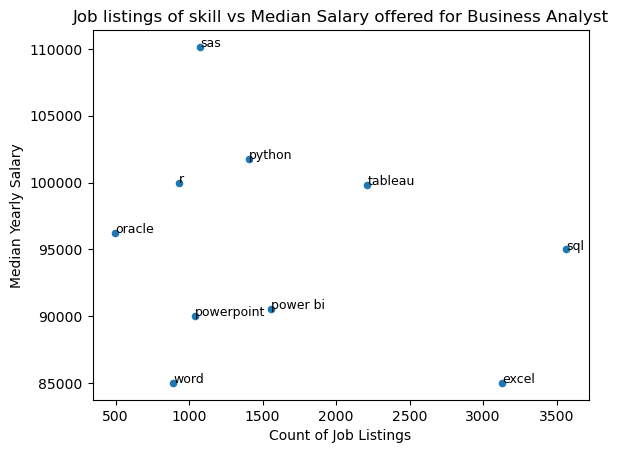

In [10]:
df_skills.plot(kind= 'scatter', x = 'count', y ='median_salary')

for i, row in enumerate(df_skills.itertuples(index=False)):
    plt.text(x=row.count,y=row.median_salary,s=row.job_skills, fontsize=9, ha='left')
# Set plot labels and title
plt.xlabel('Count of Job Listings')
plt.ylabel('Median Yearly Salary')
plt.title('Job listings of skill vs Median Salary offered for Business Analyst')

# Show the plot
plt.show()

with a simple search up of chatGPT, well gotta battle with it, but i got this: 
pretty cool right

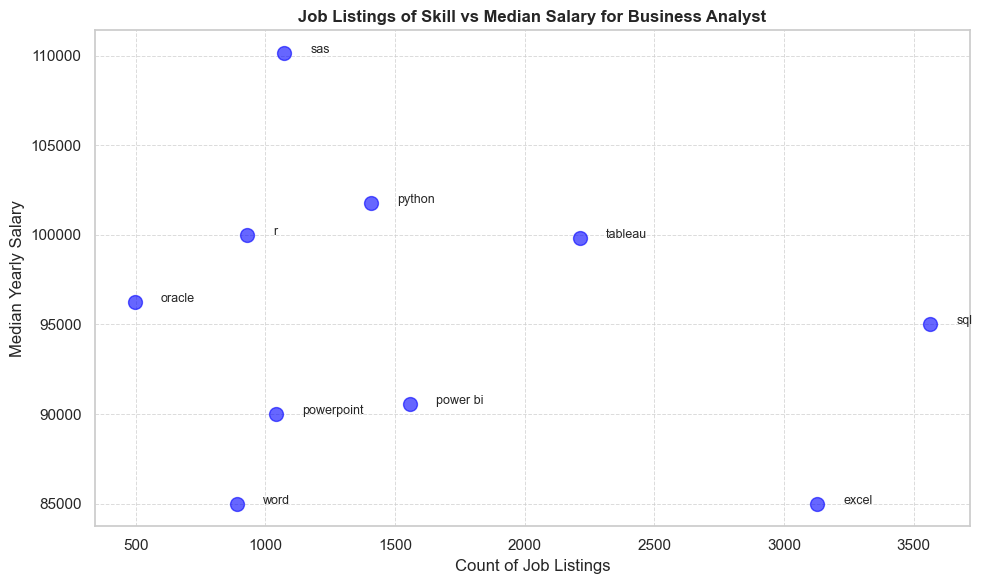

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn theme for a cleaner look
sns.set_theme(style="whitegrid")

# Create the scatter plot
df_skills.plot(kind='scatter', x='count', y='median_salary', color='blue', alpha=0.6, s=100, figsize=(10, 6))  # Alpha for transparency, s for point size

# Annotate each point with job skill labels
for i, row in enumerate(df_skills.itertuples(index=False)):
    plt.text(x=row.count + 100,  # Offset label to the right
             y=row.median_salary,
             s=row.job_skills,
             fontsize=9,
             ha='left')

# Set plot labels and title
plt.xlabel('Count of Job Listings')
plt.ylabel('Median Yearly Salary')
plt.title('Job Listings of Skill vs Median Salary for Business Analyst', fontweight='bold')

# Add gridlines for readability
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
help(plt.hist)

(0.0, 250000.0)

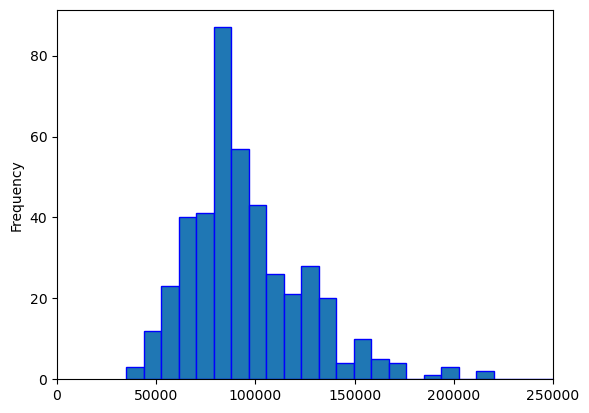

In [24]:
#we move on to histogram plot 
#good for showing long tails or if it is normal 
#for example, wages is a very good histogram candidate

df_US.salary_year_avg.plot(kind = 'hist', bins=40, edgecolor = 'blue')
plt.xlim(0,250000)




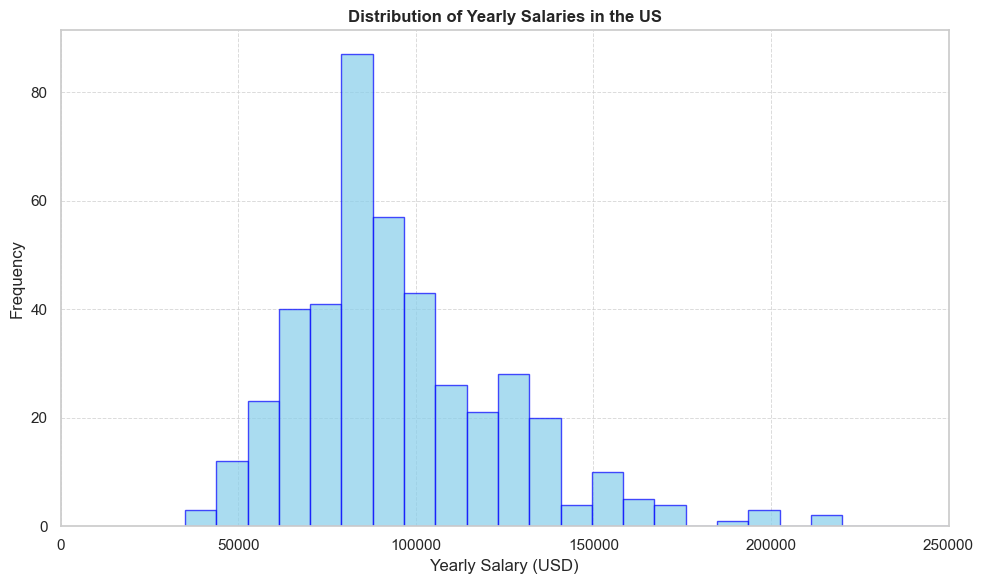

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn theme
sns.set_theme(style="whitegrid")

# Plot the histogram
df_US.salary_year_avg.plot(kind='hist', bins=40, edgecolor='blue', color='skyblue', alpha=0.7, figsize=(10, 6))

# Set the x-axis limit
plt.xlim(0, 250000)

# Set labels and title
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('Frequency')
plt.title('Distribution of Yearly Salaries in the US', fontweight='bold')

# Add gridlines for clarity
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


we move on to box plot 
box plot is very convenience as it shows statistical anomolies 1.5 +- IQR

In [28]:
df_US.columns

Index(['job_title_short', 'job_title', 'job_location', 'job_via',
       'job_schedule_type', 'job_work_from_home', 'search_location',
       'job_posted_date', 'job_no_degree_mention', 'job_health_insurance',
       'job_country', 'salary_rate', 'salary_year_avg', 'salary_hour_avg',
       'company_name', 'job_skills', 'job_type_skills'],
      dtype='object')

<Axes: title={'center': 'salary_year_avg'}, ylabel='job_title_short'>

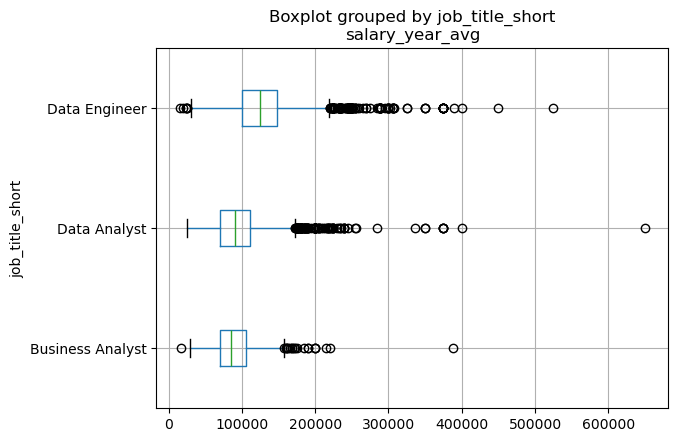

In [39]:
jobs = ['Data Analyst', 'Business Analyst', 'Data Engineer']

# Filter the DataFrame based on job titles
df_salary = df[df['job_title_short'].isin(jobs)].copy()

# Group by 'job_title_short' and calculate the median for 'salary_year_avg'
#df_salary_grouped = df_salary.groupby('job_title_short').median(numeric_only=True)['salary_year_avg']

#Plot a horizontal boxplot, very convenience, just like what to group by and what column to do the box plot on
df_salary.boxplot(column='salary_year_avg', by='job_title_short', vert=False)

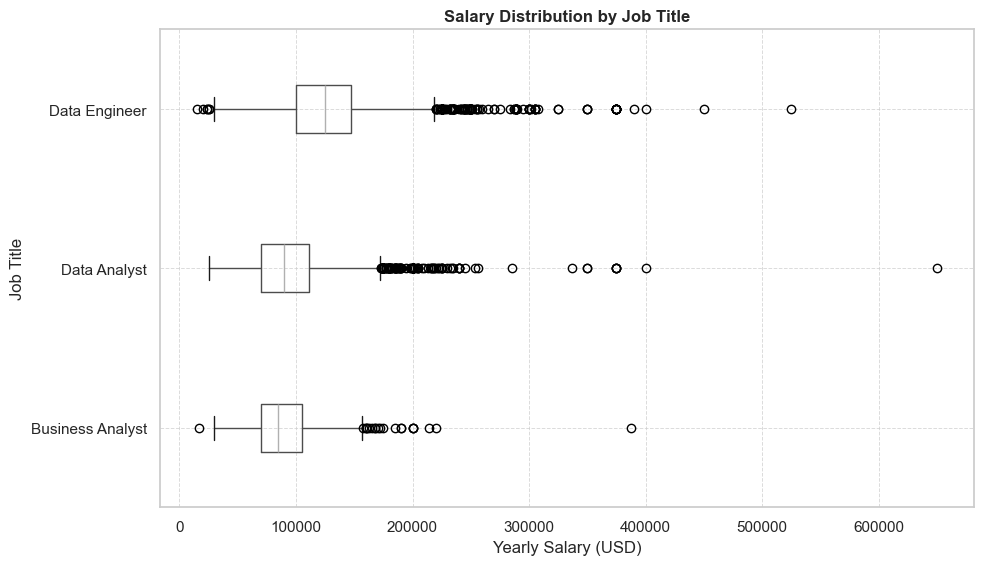

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn theme
sns.set_theme(style="whitegrid")

# Filter the DataFrame based on job titles
jobs = ['Data Analyst', 'Business Analyst', 'Data Engineer']
df_salary = df[df['job_title_short'].isin(jobs)].copy()

# Create a horizontal box plot
df_salary.boxplot(column='salary_year_avg', by='job_title_short', vert=False, grid=True, figsize=(10, 6))

# Add plot title and labels
plt.title('Salary Distribution by Job Title', fontweight='bold')
plt.suptitle('')  # Remove default 'By' title from the boxplot
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('Job Title')

# Set grid style
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()
